<a href="https://colab.research.google.com/github/AashPandey/AirBnb-Bookings-Analysis/blob/main/AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis


# 1. **Project Statement Understanding**

## **Project Scope**


This project is to perform an exploratory data analysis (EDA) on Airbnb listings in New York City. The goal is to understand the preferences for different room types and neighborhoods, and to identify patterns and trends that can provide valuable insights for stakeholders. This includes analyzing the distribution of room types, geographical preferences, and price distributions, among other factors.

## **Project Objectives**


*   Understand Room Type Preferences
*   Analyze Neighborhood Preferences
*   Identify Price Trends
*   Provide Insights for Stakeholders

## **Assumptions**



*   It is assumed that private rooms are more preferred by guests compared to entire homes/apartments and shared rooms.
*   It is assumed that the Manhattan neighborhood is more preferred by guests compared to other neighborhoods in New York City.

*   It is assumed that the dataset is representative of the overall Airbnb listings in New York City and that it contains sufficient data to perform a meaningful analysis.






# **GitHub Link -**

Provide your GitHub Link here.


# 2.  **Data Exploration and Handling Missing Values**





In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Code for mounting your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Dataset
drive_path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(drive_path)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

**Observation:**
There are 48895 rows and 16 columns, respectively.

In [6]:
# Obtaining important info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Observation:**

Some columns have null values and missing data; we need to clean those.

In [7]:
# Detect missing values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## **Observations**
1.   Columns like name, host_name, last_review, and reviews_per_month have missing values.
2.   The name and host_name columns are unnecessary because they transmit no significant information. Hence, such columns can be dropped.

1. Columns like last_review and reviews_per_month have the same number of NaN values, which means certain properties were not rated at all; hence, last_review has no date and reviews_per_month has no data. So these nan values can be replaced with zero.

In [8]:
# Drop the columns like name, host_name, and last review
df.drop(['host_name','name','last_review'],inplace=True,axis=1)

# Replacing the NaN with zero
df.fillna({'reviews_per_month':0},inplace=True)

In [9]:
#checking changes
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Observation:** All null values are eliminated

In [10]:
# Checking duplicate rows

df.duplicated().sum()

0

**Observation:** No duplicate rows are found.

In [11]:
# Omitting latitude and longitude since they are coordinates, and also excluding id and host_id because they are unique identifiers.

col_after_excluding = set(df.columns) - {'latitude', 'longitude', 'id', 'host_id'}

# Converting to list
df[list(col_after_excluding)].describe()

,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,minimum_nights,price
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,23.274466,1.090910,112.781327,7.143982,7.029962,152.720687
std,44.550582,1.597283,131.622289,32.952519,20.510550,240.154170
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,0.040000,0.000000,1.000000,1.000000,69.000000
50%,5.000000,0.370000,45.000000,1.000000,3.000000,106.000000
75%,24.000000,1.580000,227.000000,2.000000,5.000000,175.000000
max,629.000000,58.500000,365.000000,327.000000,1250.000000,10000.000000


In [12]:
dist_col_list = df[list(col_after_excluding)].describe().columns.tolist()

In [13]:
df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [14]:
df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

**Observations:**

*   
There are some listings with a price of 0.
*   There are a few listings that have a minimum nights to stay > 365





In [15]:
# Rows that have 'price = 0
df[df['price']==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [16]:
# A function for price_correction

# Changing the price value from "0" to "100"

def price_correction(x):
    if x==0:
        return 100
    else:
        return x

In [17]:
# Using the price_correction function to change the 'price'

df['price']=df['price'].apply(price_correction)

# Changing values of 'minimum_nights' to 365 that are greater than 365

df['minimum_nights']=df['minimum_nights'].apply(lambda x: 365 if x>365 else x)

### **Now, the data is cleaned, and all values that do not make sense are removed.**

# **2.   Exploratory Data Analysis**



In [ ]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


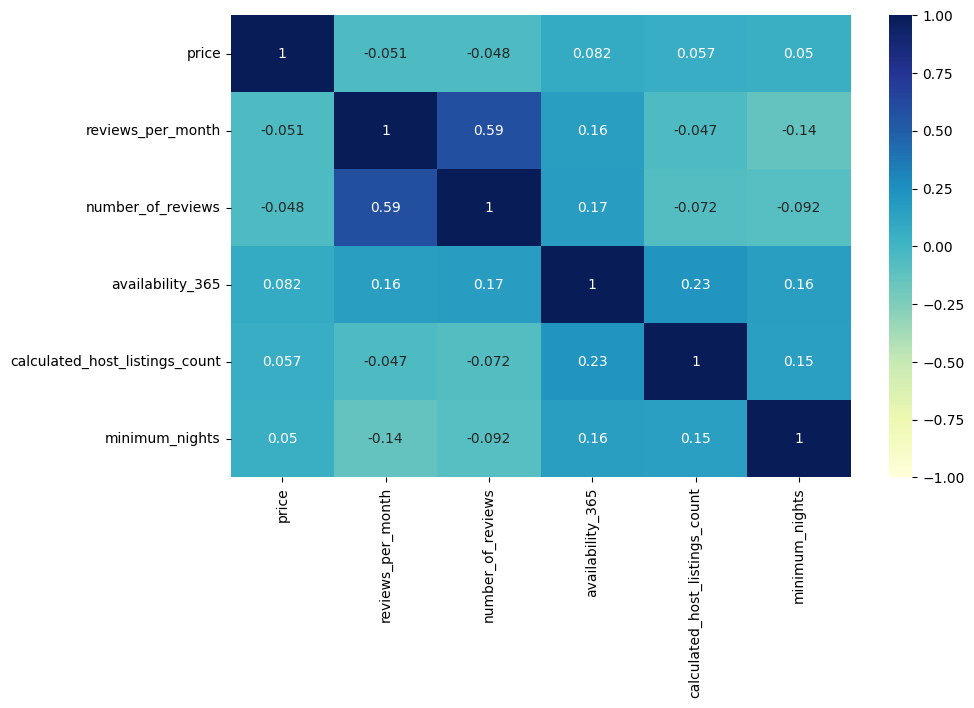

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[dist_col_list].corr(), linewidths=0, vmin=-1, annot=True, cmap="YlGnBu")
plt.show()

**Observations:**

*   Listings with more availability tend to receive more reviews, which could indicate higher occupancy rates.


*   More expensive listings might not necessarily receive more reviews, indicating that price is not the sole factor influencing guest satisfaction or frequency of booking.
*   Hosts with multiple listings might need to manage reviews and pricing more strategically, as their listings tend to have fewer reviews and might be priced slightly higher.


*   
The minimum night requirement is a crucial factor, as listings with lower minimum nights tend to receive more reviews, possibly indicating higher guest turnover.









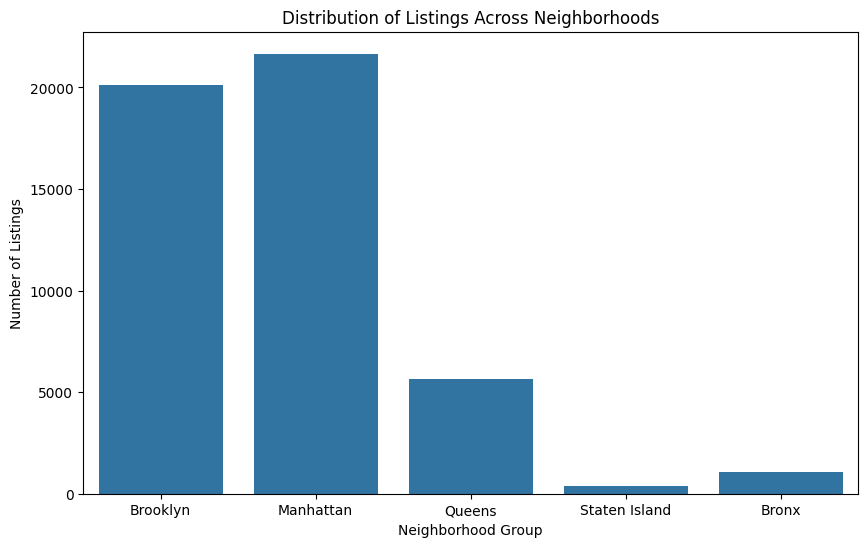

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Distribution of Listings Across Neighborhoods')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()

**Observations:**


*   Manhattan has the highest number of listings, slightly more than Brooklyn.

*   Queens has significantly fewer listings than Manhattan and Brooklyn.
*   Bronx and Staten Island have the fewest listings, with each having a minimal number compared to the other neighborhoods.



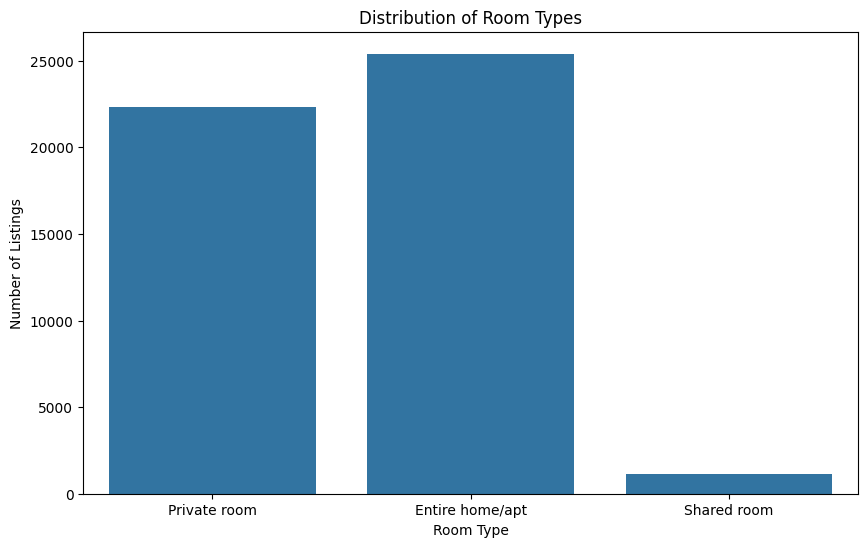

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()



**Observations**:


*   Entire Home/Apartment Dominates the Market. This suggests a high demand for more private and self-contained accommodations.

*   There are a substantial number of private room listings.This indicates that a significant portion of guests prefer having a private space within a shared property
*   Shared Rooms are the Least Preferred.













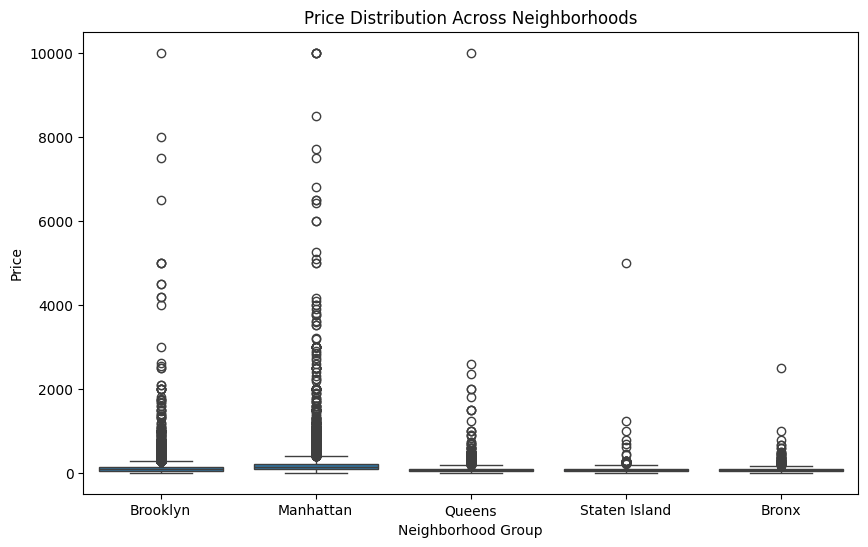

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution Across Neighborhoods')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()



**Observations:**


*   Manhattan shows a wide range of prices, with many outliers on the higher end, indicating a high demand and diverse listing prices.

*   Brooklyn has a slightly narrower range than Manhattan but still relatively high prices, with some outliers.

*   Queens shows a moderate price range, with a lower median compared to Manhattan and Brooklyn.
*   Bronx and Staten Island have the lowest median prices, indicating more affordable listings.

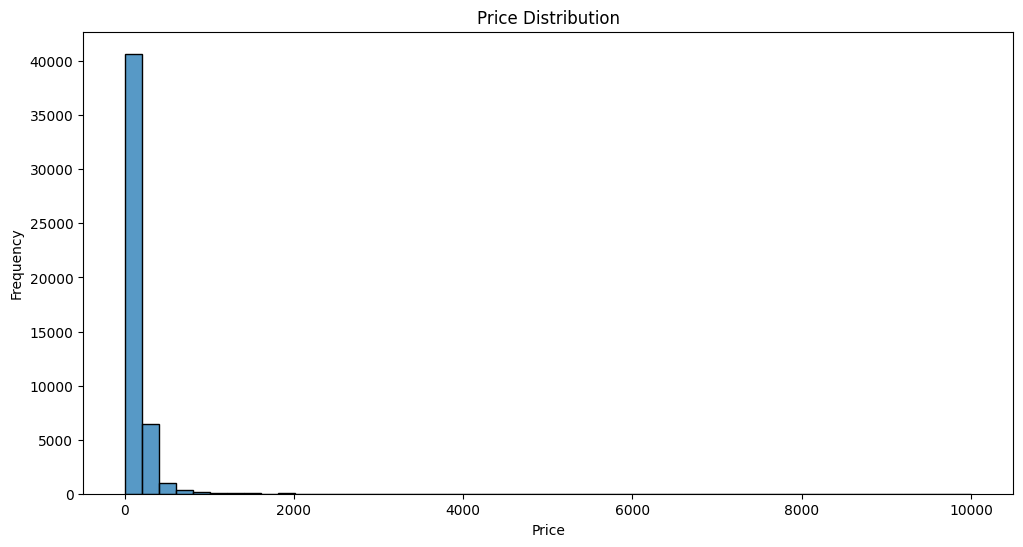

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



**Obsevation:**

The price distribution histogram reveals that most cities are priced affordably, with a significant concentration in the $0-200 range.

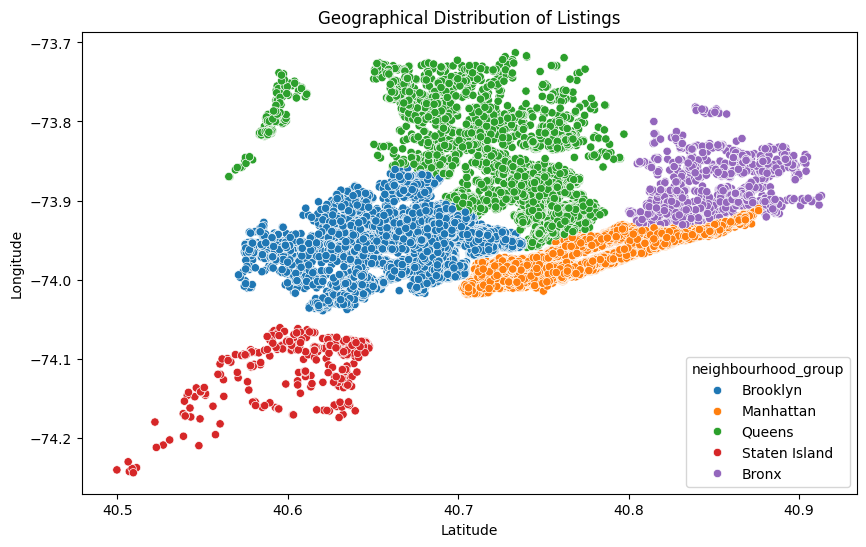

In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=df)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**Observation:**

Manhattan and Brooklyn dominate in terms of listing density, reflecting high demand and popularity. Queens has a moderate spread of listings, while Bronx and Staten Island have fewer listings, indicating niche markets.

<ipython-input-37-d4a180f73df7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])


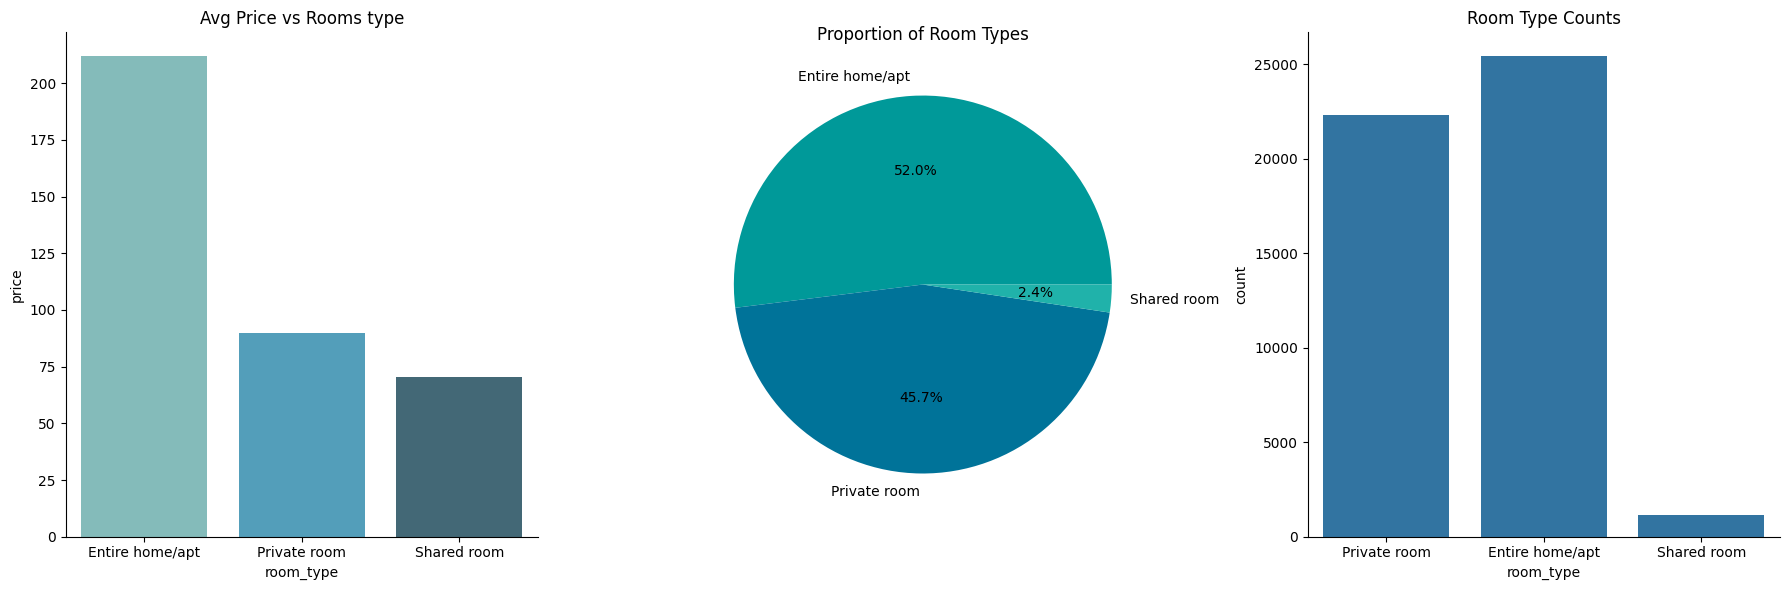

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)

**Observations:**

*   Entire home/apt has more than 50% proportion in New York City, and it has the highest AVG price also.
*   Shared rooms are the cheapest, but only have a 2.4% proportion. No wonder New York life is of a high standard.







In [18]:
# Analyze the visualizations to draw insights
room_type_counts = df['room_type'].value_counts()
print(f"Room Type Distribution:\n{room_type_counts}")

neighborhood_counts = df['neighbourhood_group'].value_counts()
print(f"Neighborhood Distribution:\n{neighborhood_counts}")

# Summarize findings
if room_type_counts.idxmax() == 'Private room':
    print("Assumption 1 is correct: Private rooms are the most preferred room type.")
else:
    print("Assumption 1 is incorrect.")

if neighborhood_counts.idxmax() == 'Manhattan':
    print("Assumption 2 is correct: Manhattan has the most listings.")
else:
    print("Assumption 2 is incorrect.")

Room Type Distribution:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64
Neighborhood Distribution:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64
Assumption 1 is incorrect.
Assumption 2 is correct: Manhattan has the most listings.


# **Conclusion:**

*   Guests show a clear preference for private accommodations, with entire homes/apartments and private rooms being the most popular.

*   Manhattan and Brooklyn are the most preferred neighborhoods, likely due to their central locations and attractions.

*   Price is a significant factor influencing guest preferences, with higher prices observed for entire homes/apartments and listings in Manhattan and Brooklyn.


**Stakeholder Insights**


*   Understanding the preferences for entire homes/apartments and private rooms can help property owners maximize occupancy rates and set competitive prices.

*   Insights into neighborhood preferences and price distributions can guide investment decisions, focusing on high-demand areas like Manhattan and Brooklyn.
*   Knowledge of price distributions across room types and neighborhoods can help guests make informed booking decisions based on their budget and accommodation preferences.






